<a href="https://colab.research.google.com/github/EPDataAnalyst/githubtest/blob/main/_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
df.shape #(212331, 15)

(212331, 15)

In [4]:
df.isnull().value_counts() #this is over the null values

School DBN  School Name  School Level  Regents Exam  Year   Total Tested  Mean Score  Number Scoring Below 65  Percent Scoring Below 65  Number Scoring 65 or Above  Percent Scoring 65 or Above  Number Scoring 80 or Above  Percent Scoring 80 or Above  Number Scoring CR  Percent Scoring CR
False       False        False         False         False  False         False       False                    False                     False                       False                        False                       False                        False              False                 212321
                                       True          False  False         False       False                    False                     False                       False                        False                       False                        False              False                     10
dtype: int64

In [5]:
df.describe() #This was just an overview of the entire dataset

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [6]:
df.head #this was a look at the top of the dataset.

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [7]:
print(df['School DBN'].str[2].unique()) #I went to the data dictionary to be clear about which school code was for which borough

['M' 'X' 'K' 'Q' 'R']


In [8]:
df['Borough'] = df['School DBN'].str[2] #extracts the third character of School DBN
borough_mapping = {
    "M": "Manhattan",
    "X": "Bronx",
    "K": "Brooklyn",
    "Q": "Queens",
    "R": "Staten Island"
}
df['Borough'] = df['Borough'].map(borough_mapping)
# extracted borough codes to their corresponding full names using the borough_mapping dictionary.
#.map() function returns a map object of the results

In [9]:
df.head().columns  #This was a view of the columns for High Schools in all  of NYC

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR', 'Borough'],
      dtype='object')

In [10]:
df.head(10) #This was a borough check to make sure i had all the boroughs after the extraction

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na,Manhattan
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na,Manhattan
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na,Manhattan
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na,Manhattan
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na,Manhattan
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na,Manhattan
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na,Manhattan
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na,Manhattan
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98,Manhattan
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4,Manhattan


In [11]:
Boroughs =df.groupby(df['Borough'])['Number Scoring 80 or Above'].count() #This was a count of the boroughs where students scored 80 and above on NYS Regent Exams

In [12]:
Boroughs.head()

Borough
Bronx            54051
Brooklyn         63645
Manhattan        48502
Queens           39633
Staten Island     6500
Name: Number Scoring 80 or Above, dtype: int64

In [13]:
Brooklyn = df[df['Borough']=='Brooklyn'] #this is where I decided to just focus on Brooklyn

In [14]:
Brooklyn.head() #Top of the Brooklyn Dataset

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
8400,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2015,11,69.7,1,9.1,10,90.9,1,9.1,5,45.5,Brooklyn
8401,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2016,26,80,1,3.8,25,96.2,13,50,25,96.2,Brooklyn
8402,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2017,70,75,7,10,63,90,26,37.1,55,78.6,Brooklyn
8403,13K008,P.S. 008 Robert Fulton,K-8,Common Core English,2016,1,s,s,s,s,s,s,s,na,na,Brooklyn
8404,13K008,P.S. 008 Robert Fulton,K-8,Common Core English,2017,1,s,s,s,s,s,s,s,na,na,Brooklyn


In [15]:
Brooklyn['Number Scoring 80 or Above'] = Brooklyn['Number Scoring 80 or Above'].astype(str) #This was create from object to string

<ipython-input-15-ade43fe3e3e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brooklyn['Number Scoring 80 or Above'] = Brooklyn['Number Scoring 80 or Above'].astype(str)


In [16]:
Brooklyn_filtered = Brooklyn[~Brooklyn['Number Scoring 80 or Above'].str.contains('s|na')] #This is a filter of values that contain 's/na'. Filtering allows for my accuracy in data.

In [17]:
Brooklyn_filtered.head() #Top of the data filtered

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
8400,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2015,11,69.7,1,9.1,10,90.9,1,9.1,5,45.5,Brooklyn
8401,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2016,26,80,1,3.8,25,96.2,13,50,25,96.2,Brooklyn
8402,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2017,70,75,7,10,63,90,26,37.1,55,78.6,Brooklyn
8405,13K008,P.S. 008 Robert Fulton,K-8,Living Environment,2017,59,76.8,12,20.3,47,79.7,27,45.8,na,na,Brooklyn
8406,13K113,M.S. 113 Ronald Edmonds Learning Center,Junior High-Intermediate-Middle,Common Core Algebra,2015,82,66.1,26,31.7,56,68.3,3,3.7,29,35.4,Brooklyn


In [30]:
Brooklyn_filtered['Number Scoring 80 or Above'] = pd.to_numeric(Brooklyn_filtered['Number Scoring 80 or Above']) #This is conversion of string values to numeric

<ipython-input-30-34218d264821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brooklyn_filtered['Number Scoring 80 or Above'] = pd.to_numeric(Brooklyn_filtered['Number Scoring 80 or Above'])


In [31]:
Brooklyn_filtered['Number Scoring 80 or Above'].dtype #This is a check to see if the values are now integers

dtype('int64')

In [35]:
bk80 = Brooklyn_filtered.groupby(Brooklyn_filtered['School Name'])['Number Scoring 80 or Above'].sum()
print(bk80)
#THis is a sum of the students in a Brooklyn who have scored 80 and greater on NYS regents

School Name
ACORN Community High School                           1036
Abraham Lincoln High School                           9869
Abraham Lincoln Yabc                                   194
Academy for College Preparation and Career Explora    1234
Academy for Conservation and the Environment          1227
                                                      ... 
Williamsburg Collegiate Charter School                1767
Williamsburg High School for Architecture and Desi    5472
Williamsburg Preparatory School                       5507
World Academy for Total Community Health High Scho     824
Young Women's Leadership School of Brooklyn           1528
Name: Number Scoring 80 or Above, Length: 303, dtype: int64


In [36]:
bk80mean = Brooklyn_filtered['Number Scoring 80 or Above'].mean()
print(bk80mean) #This is the average  number of Students in Brooklyn High Schools scored 80 or above on NYS Regents

20.55360004135008


In [28]:
Brooklyn_filtered['Percent Scoring 80 or Above'].unique() #This is a unique look at the students scores on NYS regents

array(['9.1', '50', '37.1', '45.8', '3.7', '25.5', '14.3', '30', '63.5',
       '44.3', '17.6', '34.1', '4.5', '0', '3', '1.7', '2.1', '50.9',
       '58.2', '4.2', '41.1', '4.3', '5.3', '7.1', '7.7', '4.9', '7.2',
       '3.6', '10', '16.8', '29.8', '32.1', '21.4', '38.9', '11.1', '6.7',
       '28.6', '0.6', '1.8', '31.4', '17.1', '26', '20', '1.5', '3.4',
       '8.5', '3.5', '3.8', '5.8', '21.7', '9.7', '1.2', '1.4', '8.7',
       '22.1', '2.7', '8.9', '0.7', '3.3', '2.2', '5.9', '6.5', '12',
       '24.5', '2.3', '5.6', '15.4', '7.4', '28', '33.7', '26.9', '2.8',
       '7.9', '13.5', '4.6', '14.4', '12.5', '45.9', '13.6', '18.1',
       '8.2', '15.2', '4.8', '12.2', '20.4', '22.2', '24.8', '39.8',
       '14.1', '65.5', '47.6', '51', '89.7', '97.1', '65.4', '72.8',
       '99.7', '98.3', '4', '98.9', '77.4', '65.3', '74.5', '90.1', '100',
       '84.4', '95', '92.9', '93.9', '98.1', '97.5', '96.8', '54.3',
       '66.7', '60.5', '58', '67.7', '97.4', '27.7', '20.3', '15', '14',
 

In [37]:
itav_academy=df[df['School Name'].isin(['It Takes a Village Academy'])] #I converted the name of the high school to a more shorted version. This was my old high school pick any school in this dataset as an initial comparison point

In [38]:
itav_academy.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
11004,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2015,61,51.9,42,68.9,19,31.1,1,1.6,1,1.6,Brooklyn
11005,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2016,118,56.9,63,53.4,55,46.6,9,7.6,9,7.6,Brooklyn
11006,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2017,23,55.1,15,65.2,8,34.8,0,0,0,0,Brooklyn
11007,18K563,It Takes a Village Academy,High school,Common Core Algebra,2015,168,60.9,93,55.4,75,44.6,0,0,21,12.5,Brooklyn
11008,18K563,It Takes a Village Academy,High school,Common Core Algebra,2016,298,70,56,18.8,242,81.2,14,4.7,185,62.1,Brooklyn


In [39]:
itav_academy['Number Scoring 80 or Above'].unique #Total number of unique value of people who scored

<bound method Series.unique of 11004      1
11005      9
11006      0
11007      0
11008     14
          ..
180568     s
180569    50
180570     3
180571     s
180572     s
Name: Number Scoring 80 or Above, Length: 439, dtype: object>

In [40]:
itav_academy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 11004 to 180572
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School DBN                   439 non-null    object
 1   School Name                  439 non-null    object
 2   School Level                 439 non-null    object
 3   Regents Exam                 439 non-null    object
 4   Year                         439 non-null    int64 
 5   Total Tested                 439 non-null    int64 
 6   Mean Score                   439 non-null    object
 7   Number Scoring Below 65      439 non-null    object
 8   Percent Scoring Below 65     439 non-null    object
 9   Number Scoring 65 or Above   439 non-null    object
 10  Percent Scoring 65 or Above  439 non-null    object
 11  Number Scoring 80 or Above   439 non-null    object
 12  Percent Scoring 80 or Above  439 non-null    object
 13  Number Scoring CR           

In [41]:
itav_academy['Number Scoring 80 or Above'] = itav_academy['Number Scoring 80 or Above'].astype(str)

<ipython-input-41-570e7f48363c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itav_academy['Number Scoring 80 or Above'] = itav_academy['Number Scoring 80 or Above'].astype(str)


In [43]:
itav_cleaned = itav_academy[~itav_academy['Number Scoring 80 or Above'].str.contains('s|na')]

In [44]:
itav_cleaned.head() # This is a cleaned version of the data without 's or na'
#'s' value means less than 5 people took the exam.

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Borough
11004,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2015,61,51.9,42,68.9,19,31.1,1,1.6,1,1.6,Brooklyn
11005,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2016,118,56.9,63,53.4,55,46.6,9,7.6,9,7.6,Brooklyn
11006,18K563,It Takes a Village Academy,High school,Algebra2/Trigonometry,2017,23,55.1,15,65.2,8,34.8,0,0,0,0,Brooklyn
11007,18K563,It Takes a Village Academy,High school,Common Core Algebra,2015,168,60.9,93,55.4,75,44.6,0,0,21,12.5,Brooklyn
11008,18K563,It Takes a Village Academy,High school,Common Core Algebra,2016,298,70,56,18.8,242,81.2,14,4.7,185,62.1,Brooklyn


In [45]:
itav_cleaned['Number Scoring 80 or Above'].unique

<bound method Series.unique of 11004      1
11005      9
11006      0
11007      0
11008     14
          ..
180564    82
180565     3
180566     5
180569    50
180570     3
Name: Number Scoring 80 or Above, Length: 303, dtype: object>

In [46]:
itav_academy = itav_cleaned[['School Name','Regents Exam','Year','Total Tested','Number Scoring 80 or Above']]

In [47]:
itav_academy['Number Scoring 80 or Above']=pd.to_numeric(itav_academy['Number Scoring 80 or Above'], errors='coerce').astype(int)

<ipython-input-47-74d4f3754a08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itav_academy['Number Scoring 80 or Above']=pd.to_numeric(itav_academy['Number Scoring 80 or Above'], errors='coerce').astype(int)


In [48]:
itav_academy['Number Scoring 80 or Above'].dtype

dtype('int64')

In [49]:
itav_academy.shape  # this is the shape of the data.

(303, 5)

In [50]:
itav_academy.head()

,School Name,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
11004,It Takes a Village Academy,Algebra2/Trigonometry,2015,61,1
11005,It Takes a Village Academy,Algebra2/Trigonometry,2016,118,9
11006,It Takes a Village Academy,Algebra2/Trigonometry,2017,23,0
11007,It Takes a Village Academy,Common Core Algebra,2015,168,0
11008,It Takes a Village Academy,Common Core Algebra,2016,298,14


In [51]:
itav80r = itav_academy.groupby(itav_academy['Regents Exam'])['Number Scoring 80 or Above'].sum()
print(itav80r)

Regents Exam
Algebra2/Trigonometry                35
Common Core Algebra                 235
Common Core Algebra2                 10
Common Core English                1309
Common Core Geometry                 20
English                             208
Geometry                             67
Global History and Geography        739
Integrated Algebra                   22
Living Environment                  375
Physical Settings/Chemistry           7
Physical Settings/Earth Science     300
Physical Settings/Physics             8
U.S. History and Government        1001
Name: Number Scoring 80 or Above, dtype: int64


In [52]:
itav80 = itav_academy['Number Scoring 80 or Above'].mean()
print(itav80)

14.310231023102311


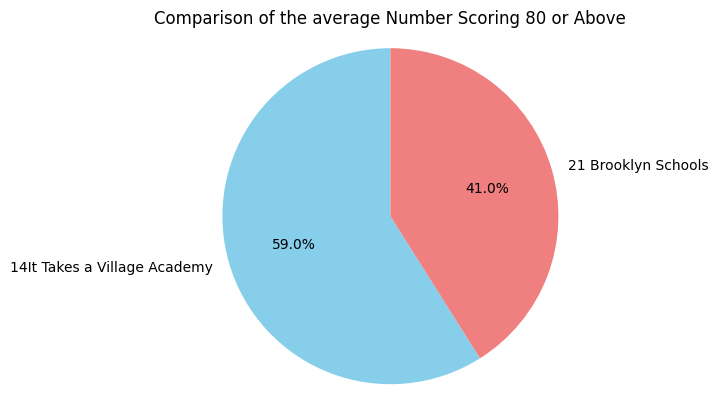

In [58]:
labels = ['14It Takes a Village Academy' ,'21 Brooklyn Schools']
sizes = [bk80mean, itav80]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')
plt.title('Comparison of the average Number Scoring 80 or Above')
plt.show() #Over a period of 3 years It Takes a Village Academy the average number of students who scored 80 or above on the regents exams whereas in Brooklyn students over all scored at 41%